# Sprint 4 – Correlações e Formulação de Hipóteses
Nesta etapa, eu quero entender se existe alguma relação entre variáveis numéricas do nosso conjunto de dados. Isso ajuda a pensar em hipóteses que podem ser testadas mais pra frente, ou até usadas no dashboard.

In [3]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [4]:
# Carregando os dados que vou usar
pedidos = pd.read_csv('../data/raw/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
itens = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
pagamentos = pd.read_csv('../data/raw/olist_order_payments_dataset.csv')

## 1. Criando colunas úteis
Vou calcular o tempo de entrega e o valor total dos pedidos (itens + pagamentos).

In [12]:
# Criando coluna de tempo de entrega
pedidos['tempo_entrega'] = (pedidos['order_delivered_customer_date'] - pedidos['order_purchase_timestamp']).dt.days

In [13]:
# Somando os valores dos itens por pedido
total_itens = itens.groupby('order_id')['price'].sum().reset_index(name='valor_total_itens')

In [7]:
# Somando os valores pagos por pedido
total_pagamento = pagamentos.groupby('order_id')['payment_value'].sum().reset_index(name='valor_pagamento')

In [14]:
# Juntando tudo em um único DataFrame
dados = pd.merge(pedidos, total_itens, on='order_id', how='left')
dados = pd.merge(dados, total_pagamento, on='order_id', how='left')

## 2. Matriz de Correlação
Quero ver se essas variáveis estão relacionadas entre si.

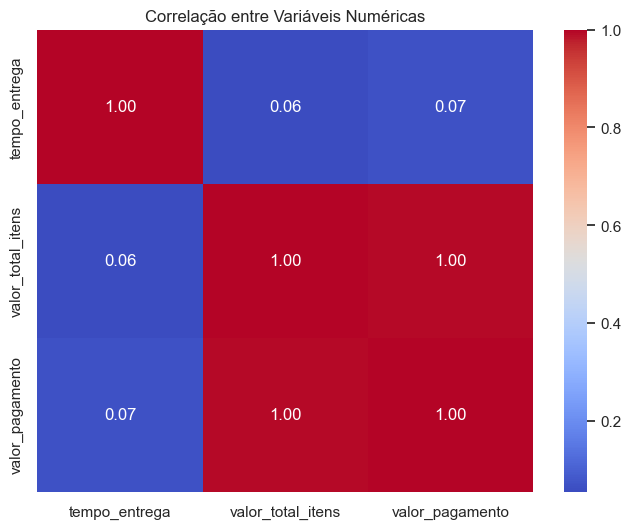

In [9]:
numericas = dados[['tempo_entrega', 'valor_total_itens', 'valor_pagamento']].dropna()
correlacoes = numericas.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

## 3. Gráficos de Dispersão
Agora vou visualizar a relação entre essas variáveis.

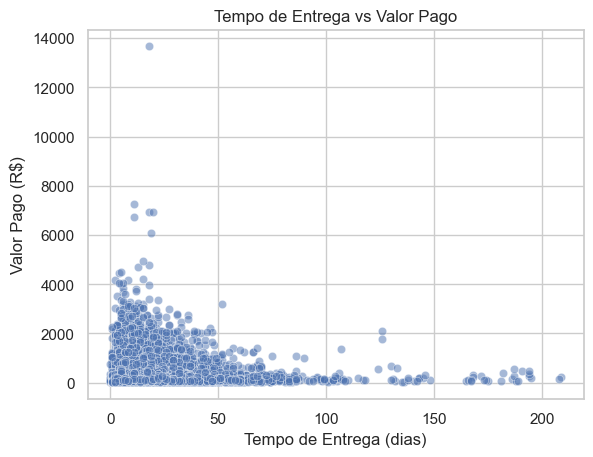

In [10]:
# Tempo de entrega vs valor pago
sns.scatterplot(x='tempo_entrega', y='valor_pagamento', data=numericas, alpha=0.5)
plt.title('Tempo de Entrega vs Valor Pago')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Valor Pago (R$)')
plt.show()

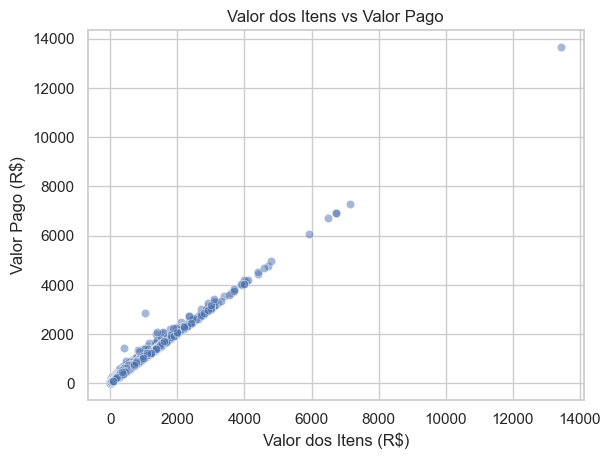

In [11]:
# Valor dos itens vs valor pago
sns.scatterplot(x='valor_total_itens', y='valor_pagamento', data=numericas, alpha=0.5)
plt.title('Valor dos Itens vs Valor Pago')
plt.xlabel('Valor dos Itens (R$)')
plt.ylabel('Valor Pago (R$)')
plt.show()

## 4. Hipóteses criadas com base nas análises
- Hipótese 1: Pedidos com valor de itens mais alto tendem a ter maior valor pago.
- Hipótese 2: O tempo de entrega não parece influenciar o valor pago.
- Hipótese 3: A diferença entre valor dos itens e valor pago pode estar relacionada ao valor do frete ou número de parcelas.

## 5. Conclusão
Consegui identificar algumas relações entre variáveis e criei hipóteses que podem ser testadas futuramente. Isso vai ajudar bastante na construção do dashboard.